  <div class="alert alert-info">
  Привет, Алексей! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

  <div class="alert alert-success">
  <b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
  </div>
  <div class="alert alert-warning">
  <b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
  </div>
  <div class="alert alert-danger">
  <b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
  </div>
  <div class="alert alert-info">
  <b>👂 Совет:</b> Какие-то дополнительные материалы
  </div>
  Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
  Мне будет легче отследить изменения, если ты выделишь свои комментарии:
  <div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
  Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
   </div>

<div class="alert alert-info">
<b> Выпускной проект: Анализ оттока клиентов "МетанПромБанка".

<div class="alert alert-info">
Ссылка на презентацию: https://docs.google.com/presentation/d/1e0CZ2c_9Hxh3xd_uJNMzmIEnPjYY2EeN2jx8tIpvTTM/edit?usp=drive_link

<div class="alert alert-info">
Задача проекта: проанализировать пользователей регионального банка и выделить сегменты клиентов, которые склонны к уходу из банка.
    
    
Подзадачи проекта:
    
- Провести исследовательский анализ данных, определить признаки отточности;
- Сформулировать и проверить статистические гипотезы (хотя бы парочку);
- Обозначить сегменты, отобрать из них лучшие и дать по ним рекомендации.

<div class="alert alert-info"> Оглавление проекта:

    
1. Знакомство с данными. Приведение их в божеский вид.
2. Исследовательский анализ (EDA & VODA).
3. Прогноз оттока клиентов.
4. Выделение сегментов пользователей.
5. Минутка статистических гипотез.
6. Общий вывод и рекомендации.
    
В завершение исследования требуется дать отделу маркетинга банка рекомендации по уменьшению оттока клиентов, которые помогут  определить точки роста, а также подготовить презентацию с основными выводами.

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Выделение сегментов проводится с помощью срезов query(), кластеризацию делать не нужно
</div>

Done!

<div class="alert alert-info">
Описание данных: датасет содержит данные о клиентах банка, который располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. 
    
Столбцы датасета:
    
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

<div class="alert alert-info">  
    
***Глава 1. Обзор предоставленных данных***
    
Загрузим библиотеки, оценим внешний вид, предобработаем данные.

In [1]:
pip install phik 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import phik
import scipy.stats as st

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid': 'user_id'})
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<div class="alert alert-info"> На первый взгляд, прекрасные данные: 12 столбцов по 10 тыс. запсей. Пропуски есть в двух столбцах (возраст и баланс). Только в столбце с балансом значительная часть пропусков (>10%). Сразу приводим названия столбцов к нижнему регистру.

In [4]:
data['age'] = data['age'].fillna('данных нет')
data.drop(data.loc[data['age'] == 'данных нет'].index, inplace=True)
data['age'] = data['age'].astype(int)

In [5]:
data.drop(data.loc[data['products'] == 0].index, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1012.9+ KB


In [7]:
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].agg(['max', 'mean', 'median', 'min'])

,score,age,equity,balance,products,est_salary
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06
mean,848.671212,42.730773,2.630803,8.272456e+05,1.871653,1.477991e+05
median,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.196431e+05
min,642.000000,18.000000,0.000000,0.000000e+00,1.000000,2.546300e+03


In [8]:
data['credit_card'].unique()

array([0, 1])

In [9]:
data['last_activity'].unique()

array([1, 0])

In [10]:
data['churn'].unique()

array([1, 0])

In [11]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [12]:
data.duplicated().sum()

0

In [13]:
data.duplicated(subset=['user_id']).sum()

50

In [14]:
data.duplicated(subset=['user_id', 'age']).sum()

5

<div class="alert alert-info"> 
    
- Первым делом удаляем строки датасета с пропусками в столбце "Возраст" (26 записей) и строки с нулями в столбце "Продукты банка" (1 запись, клиент банка не может быть без продуктов).
- Оцениваем границы числовых значений в столбцах (баллы скоринга, возраст, оценка собственности, баланс карты, количество продуктов и предположительная з\п) - аномалий не наблюдаем.
- Выявляем столбцы с категориальными признаками (кредитка, последняя активность, факт оттока).
- Проверяем, что в датасете действительно представлены три населенных пункта.
- Видим, что явных дубликатов в датасете нет.
- Неявные дубликаты не удаляем, ввиду предположения о том, что ранее у каждого из филиалов банка была своя БД клиентов со своей нумерацией user_id. При соединении баз в одну сюда попали пользователи со своим старым id, хотя, наверное, стоило бы сделать новый столбец с новой нумерацией.
    
Предобработка данных завершена, переходим к следующей главе.

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и предобработан
</div>

<div class="alert alert-info">  
    
***Глава 2. Исследовательский анализ данных***
    
Визуализируем распределение данных внутри каждого столбца, скоррелируем данные, очертим портреты уходящих клиентов.

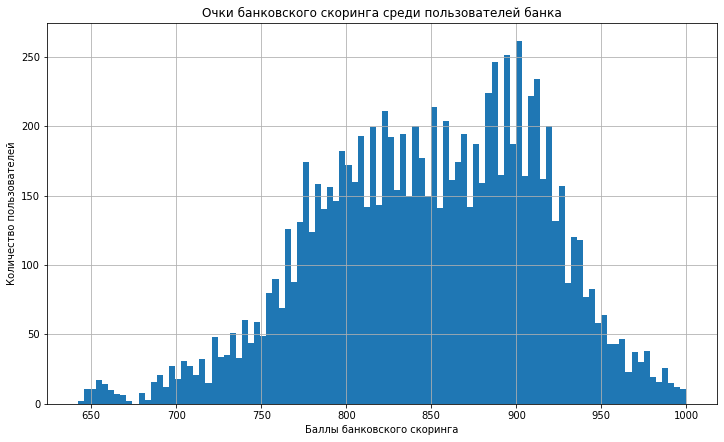

In [15]:
plt.figure(figsize= (12,7))
data['score'].hist(bins=100)
plt.title('Очки банковского скоринга среди пользователей банка')
plt.xlabel('Баллы банковского скоринга')
plt.ylabel('Количество пользователей')
plt.show() 

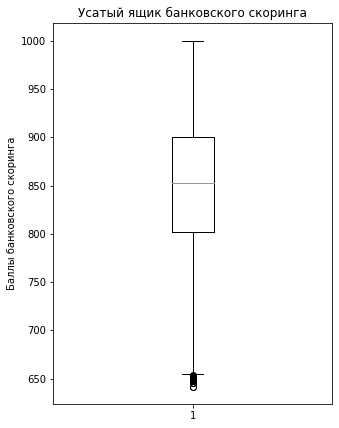

In [16]:
plt.figure(figsize =(5, 7))
plt.boxplot(data['score'])
plt.title('Усатый ящик банковского скоринга')
plt.ylabel('Баллы банковского скоринга')
plt.show()

<div class="alert alert-info"> Баллы банковского скоринга распределены нормально. Основная масса пользователей имеет от 770 до 930 баллов, медиана - 853 балла.

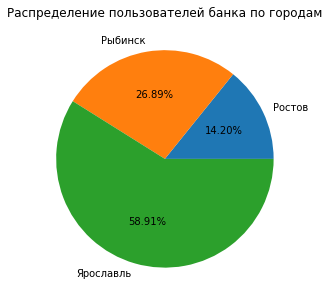

In [17]:
data.groupby('city')['user_id'].count().sort_values().plot(kind='pie', figsize=(5, 5), autopct='%1.2f%%')
plt.title('Распределение пользователей банка по городам')
plt.ylabel(' ')
plt.show()

<div class="alert alert-info"> Почти 59 процентов клиентов проживают в столице области - Ярославле, во втором по населенности городе края - Рыбинске - 27 процентов, в Великом Ростове - чуть больше 14%.

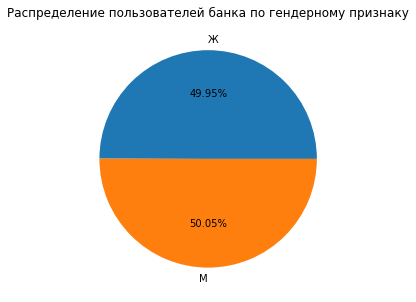

In [18]:
data.groupby('gender')['user_id'].count().sort_values().plot(kind='pie', figsize=(5, 5), autopct='%1.2f%%')
plt.title('Распределение пользователей банка по гендерному признаку')
plt.ylabel(' ')
plt.show()

<div class="alert alert-info"> Битва полов: почти поровну представлены и мужчины, и женщины.

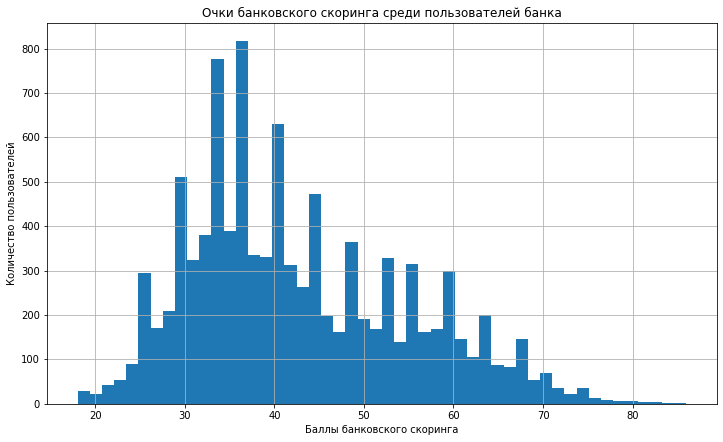

In [19]:
plt.figure(figsize= (12,7))
data['age'].hist(bins=50)
plt.title('Очки банковского скоринга среди пользователей банка')
plt.xlabel('Баллы банковского скоринга')
plt.ylabel('Количество пользователей')
plt.show() 

<div class="alert alert-info"> Возраст клиентов распределен нормально с медианным значением в 40 лет. Основная масса пользователей - от 24 до 70 лет.

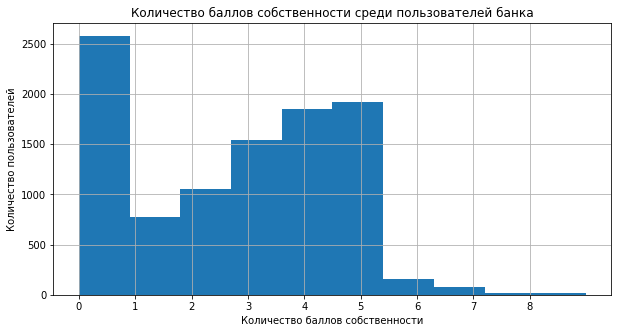

In [20]:
plt.figure(figsize= (10,5))
data['equity'].hist(bins=10)
plt.xticks(range(0, 9, 1))
plt.title('Количество баллов собственности среди пользователей банка')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Количество пользователей')
plt.show() 

<div class="alert alert-info"> Медианное значение баллов собственности - 3. У основной массы пользователей от 0 до 5 баллов.

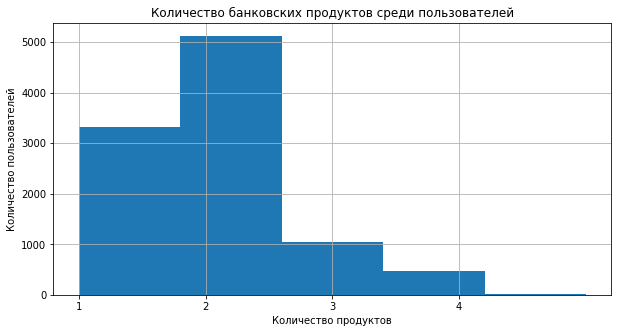

In [21]:
plt.figure(figsize= (10,5))
data['products'].hist(bins=5)
plt.xticks(range(1, 5, 1))
plt.title('Количество банковских продуктов среди пользователей')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество пользователей')
plt.show() 

<div class="alert alert-info"> Количество продуктов распределено нормально. Более половины клиентов имеют 2 банковских продукта.

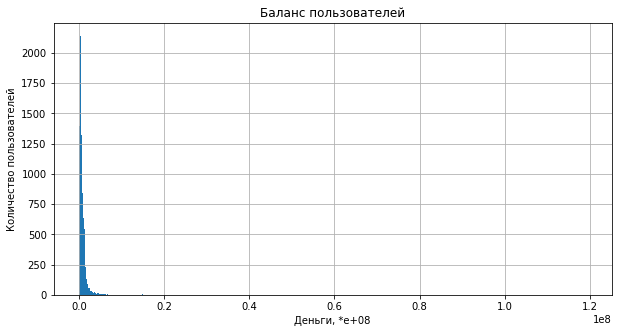

In [22]:
plt.figure(figsize= (10,5))
data['balance'].hist(bins=500)
plt.title('Баланс пользователей')
plt.xlabel('Деньги, *e+08')
plt.ylabel('Количество пользователей')
plt.show() 

<div class="alert alert-info"> Превалирующее большинство клиентов располагаются в начале графика (баланс от 0 до 1 млн.денег)

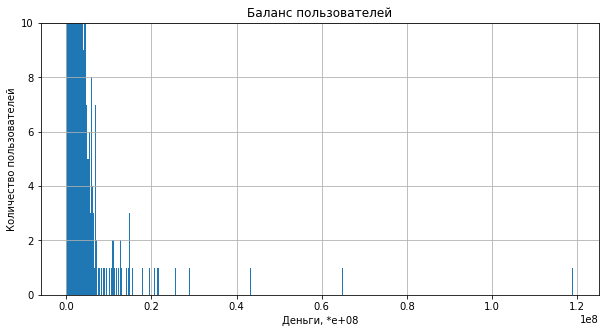

In [23]:
plt.figure(figsize= (10,5))
plt.ylim(0, 10)
data['balance'].hist(bins=500)
plt.title('Баланс пользователей')
plt.xlabel('Деньги, *e+08')
plt.ylabel('Количество пользователей')
plt.show() 

<div class="alert alert-info"> При разгрублении масштаба вертикальной оси графика видим, что  у считанных единиц на счету более 5 млн. денег. Медиана баланса равна 5.24e+05.

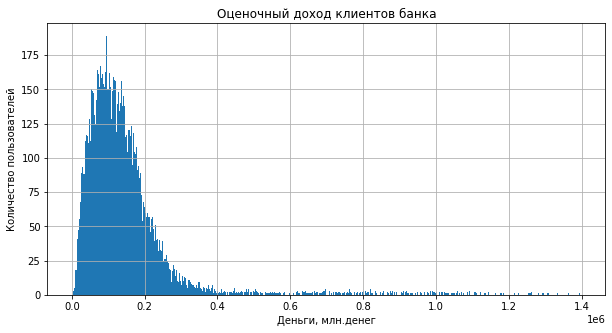

In [24]:
plt.figure(figsize= (10,5))
data['est_salary'].hist(bins=500)
plt.title('Оценочный доход клиентов банка')
plt.xlabel('Деньги, млн.денег')
plt.ylabel('Количество пользователей')
plt.show() 

In [25]:
len(data[data['est_salary'] > 400000])

335

<div class="alert alert-info"> Медиана оценочного дохода равна 120 тыс.денег/месяц. 3,35 % клиентов имеют предположительный доход более 400 тыс.денег/месяц.

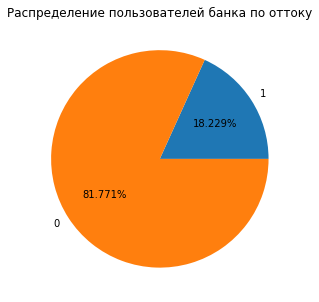

In [26]:
data.groupby('churn')['user_id'].count().sort_values().plot(kind='pie', figsize=(5, 5), autopct='%1.3f%%')
plt.title('Распределение пользователей банка по оттоку')
plt.ylabel(' ')
plt.show()

<div class="alert alert-info"> В результате, нам стоит побороться за возврат 18 % клиентов.

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


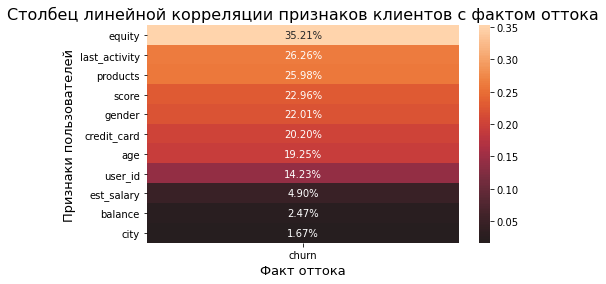

In [27]:
corr = data.phik_matrix()
plt.figure(figsize = (7,4))
sns.heatmap(corr.loc[:,['churn']].sort_values('churn', ascending=False).drop('churn'),annot = True,fmt = '.2%',center=0)
plt.title('Столбец линейной корреляции признаков клиентов с фактом оттока', fontsize=16) 
plt.xlabel('Факт оттока', fontsize=13)
plt.ylabel('Признаки пользователей', fontsize=13)
plt.show() 

<div class="alert alert-info"> Напрямую факт оттока слабо положительно коррелирует лишь с количеством баллов собственности. Составим портреты клиентов, наиболее склонных к оттоку, для чего сгруппируем их по полу и месту жительства.

In [28]:
data[['score', 'age', 'gender', 'city', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']].groupby(['churn', 'gender', 'city']).agg('median').round()

score  age  equity   balance  products  credit_card  \
churn gender city                                                             
0     Ж      Ростов     839.0   45       3  464725.0         2            1   
             Рыбинск    851.0   43       3  473067.0         2            1   
             Ярославль  847.0   42       3  496022.0         2            1   
      М      Ростов     838.0   39       3  445213.0         2            1   
             Рыбинск    848.0   39       2  475322.0         2            1   
             Ярославль  853.0   38       2  459649.0         2            1   
1     Ж      Ростов     857.0   41       4  631941.0         2            0   
             Рыбинск    866.0   50       4  698946.0         2            0   
             Ярославль  870.0   39       4  809407.0         2            0   
      М      Ростов     854.0   40       4  664471.0         2            1   
             Рыбинск    868.0   38       4  651942.0         2            1   
             Ярославль  868.0   37       4  893391.0         2            1   

                        last_activity  est_salary  
churn gender city                                  
0     Ж      Ростов                 1     91192.0  
             Рыбинск                1    103440.0  
             Ярославль              0    117260.0  
      М      Ростов                 0    107422.0  
             Рыбинск                1    124588.0  
             Ярославль              0    139444.0  
1     Ж      Ростов                 1    111515.0  
             Рыбинск                1    114778.0  
             Ярославль              1    127743.0  
      М      Ростов                 1    106099.0  
             Рыбинск                1    120689.0  
             Ярославль              1    135662.0

<div class="alert alert-info">  
Сравнение медианных значений признаков отточных клиентов с их неотточными аналогами:
    
    
- Женщины из Ростова: 857 баллов скоринга (против 839), 41 год (против 45), 4 - оценка собственности (против 3), баланс 632 тыс. (против 464 тыс.), банковских продуктов 2, кредитной карты нет (в отличие от неотточного аналога), недавняя активность есть, предположительная з/п 111 тыс. (против 91 тыс.);
- Женщины из Рыбинска: 866 баллов скоринга (против 851), 50 лет (против 43), 4 - оценка собственности (против 3), баланс 699 тыс. (против 473 тыс.), банковских продуктов 2, кредитной карты нет (в отличие от неотточного аналога), недавняя активность есть (у аналога нет), предположительная з/п 114 тыс. (против 103 тыс.);
- Женщины из Ярославля: 870 баллов скоринга (против 847), 39 лет (против 42), 4 - оценка собственности (против 3), баланс 809 тыс. (против 496 тыс.), банковских продуктов 2, кредитной карты нет (в отличие от неотточного аналога), недавняя активность есть (в отличие от неотточного аналога), предположительная з/п 127 тыс. (против 117 тыс.);
    
Характерные черты женщин в оттоке: ~ на 20 баллов скоринга больше, оценка собственности - 4, ~ на 200 тыс.денег больше на счету, кредитки нет, от 111 до 117 тыс.денег з/п.
    
- Мужчины из Ростова: 854 баллов скоринга (против 838), 40 лет (против 39), 4 - оценка собственности (против 3), баланс 664 тыс. (против 445 тыс.), банковских продуктов 2, кредитная карта есть, недавняя активность есть (в отличие от неотточного аналога), предположительная з/п 106 тыс. (против 107 тыс.); 
- Мужчины из Рыбинска: 868 баллов скоринга (против 848), 38 лет (против 39), 4 - оценка собственности (против 2), баланс 652 тыс. (против 475 тыс.), банковских продуктов 2, кредитная карта есть, недавняя активность есть, предположительная з/п 120 тыс. (против 124 тыс.);
- Мужчины из Ярославля: 868 баллов скоринга (против 853), 37 лет (против 38), 4 - оценка собственности (против 2), баланс 893 тыс. (против 459 тыс.), банковских продуктов 2, кредитная карта есть, недавняя активность есть (в отличие от неотточного аналога), предположительная з/п 135 тыс. (против 139 тыс.);
    
Характерные черты мужчин в оттоке: ~ на 15 баллов скоринга больше, оценка собственности - 4, ~ на 200 тыс.денег больше на счету, от 106 до 135 тыс.денег з/п.    

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично! Портреты уходящих и остающихся клиентов описаны
</div>

<div class="alert alert-info">  
    
***Глава 3. Прогноз оттока клиентов***
    
Посмотрим на клиентские признаки в разрезе вероятности оттока.

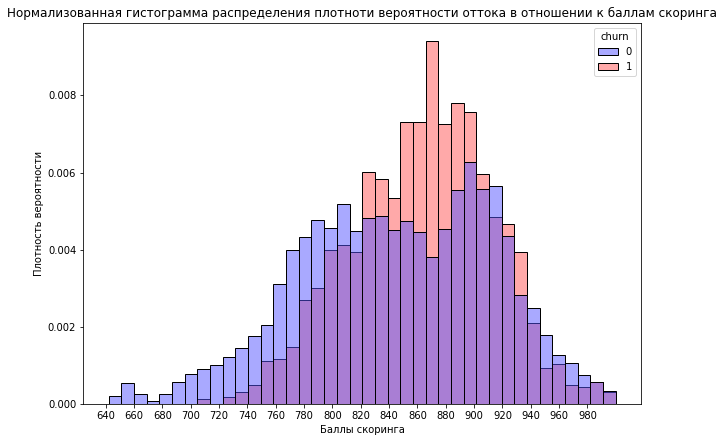

In [29]:
plt.figure(figsize=(10,7))
           
sns.histplot(data = data, hue = 'churn', x = 'score', stat = 'density', common_norm = False, palette="seismic")
plt.xticks(range(640, 1000, 20))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к баллам скоринга')
plt.xlabel('Баллы скоринга')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> Вероятность оттока повышенная при баллах скоринга от 820 до 930.

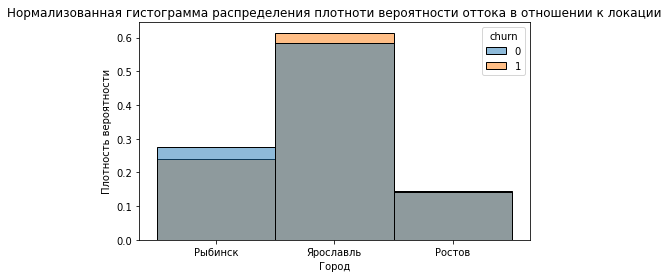

In [30]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'city', stat = 'density', common_norm = False)
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к локации')
plt.xlabel('Город')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> Вероятность оттока пониженная, если ваш банк в Рыбинске.

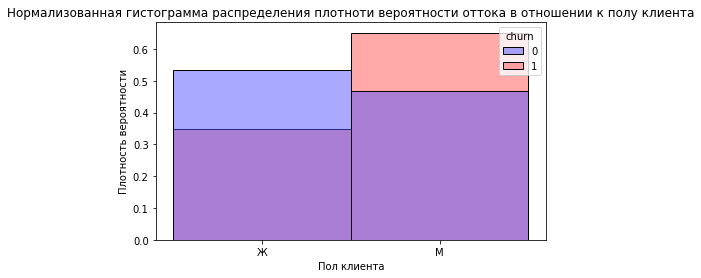

In [31]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'gender', stat = 'density', common_norm = False, palette="seismic")
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к полу клиента')
plt.xlabel('Пол клиента')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> Вероятность оттока повышенная у клиентов мужского пола.

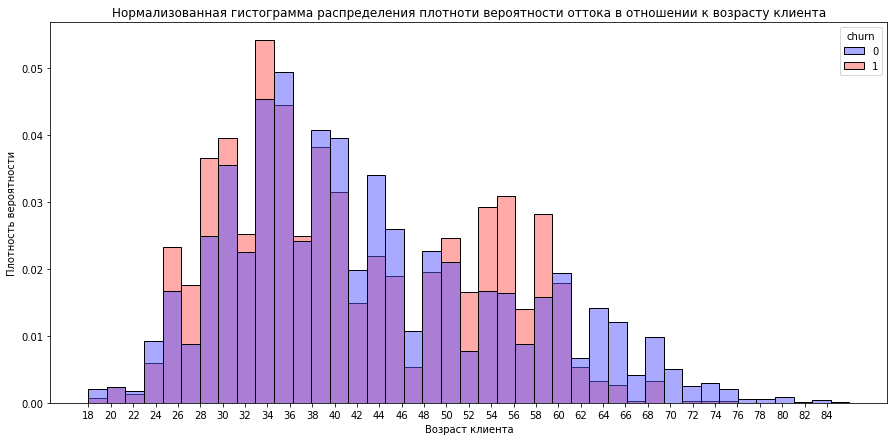

In [32]:
plt.figure(figsize=(15,7))
           
sns.histplot(data = data, hue = 'churn', x = 'age', stat = 'density', common_norm = False, palette="seismic")
plt.xticks(range(18, 86, 2))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к возрасту клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> Вероятность оттока повышенная у клиентов от 25 до 34 и от 50 до 59 лет.

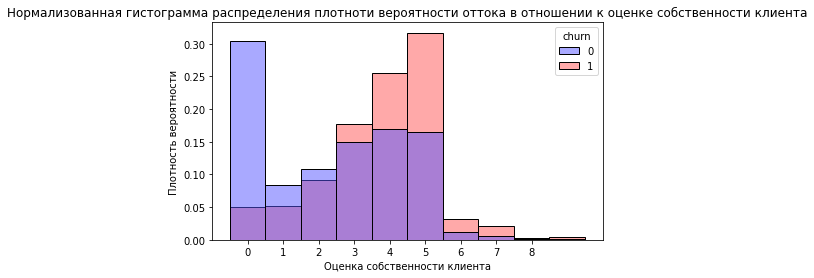

In [33]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'equity', stat = 'density', common_norm = False, discrete=True, palette="seismic")
plt.xticks(range(0, 9, 1))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к оценке собственности клиента')
plt.xlabel('Оценка собственности клиента')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> Вероятность оттока повышенная у клиентов с оценкой собственности от 3 до 9.

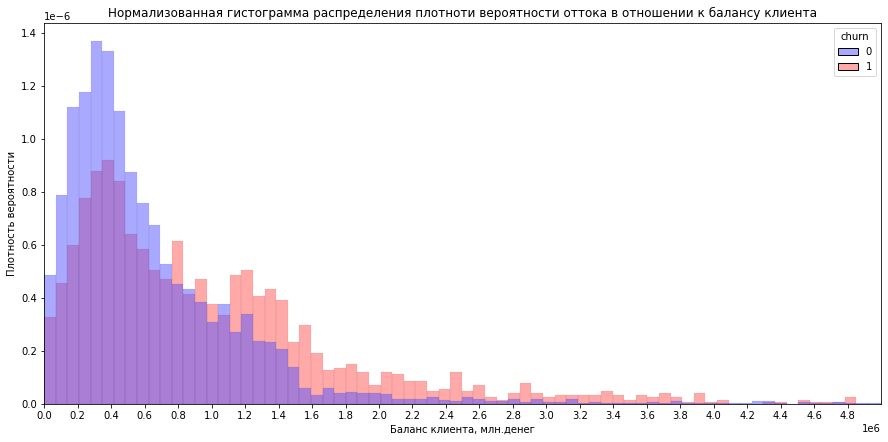

In [34]:
plt.figure(figsize=(15,7))
           
sns.histplot(data = data, hue = 'churn', x = 'balance', stat = 'density', common_norm = False, palette="seismic")
plt.xlim(0, 5000000)
plt.xticks(range(0, 5000000, 200000))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к балансу клиента')
plt.xlabel('Баланс клиента, млн.денег')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> При оценке баланса основной массы клиентов видим, что вероятность оттока повышенная у клиентов с балансом более 800 тыс. денег.

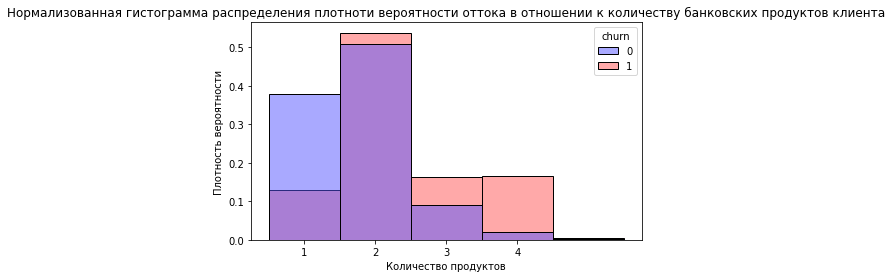

In [35]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'products', stat = 'density', common_norm = False, discrete=True, palette="seismic")
plt.xticks(range(1, 5, 1))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к количеству банковских продуктов клиента')
plt.xlabel('Количество продуктов')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> При оценке количества продуктов банка видим, что вероятность оттока низкая только у клиентов с одним продуктом. Причем, вероятность оттока растет прямо пропорционально количеству продуктов.

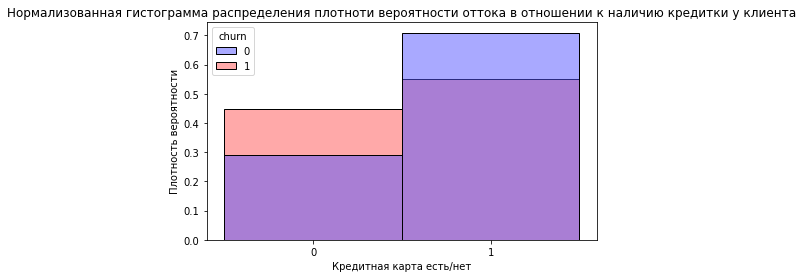

In [36]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'credit_card', stat = 'density', common_norm = False, discrete=True, palette="seismic")
plt.xticks(range(0, 2, 1))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к наличию кредитки у клиента')
plt.xlabel('Кредитная карта есть/нет')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> При оценке фактора наличия кредитной карты видим, что вероятность оттока повышена у клиентов без кредитной карты.

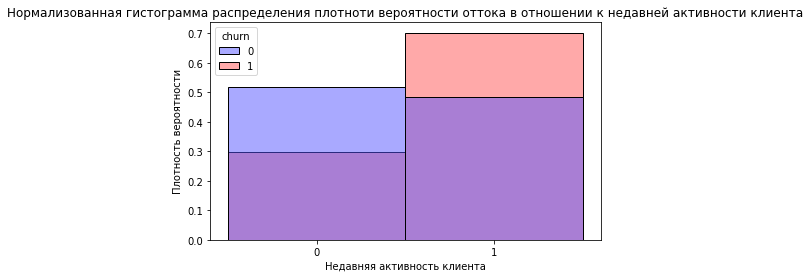

In [37]:
plt.figure(figsize=(7,4))
           
sns.histplot(data = data, hue = 'churn', x = 'last_activity', stat = 'density', common_norm = False, discrete=True, palette="seismic")
plt.xticks(range(0, 2, 1))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к недавней активности клиента')
plt.xlabel('Недавняя активность клиента')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> При оценке фактора наличия кредитной карты видим, что вероятность оттока повышена у клиентов с недавней активностью (видимо, человек вспомнил про свой счёт, вывел все сбережения и оттёк).

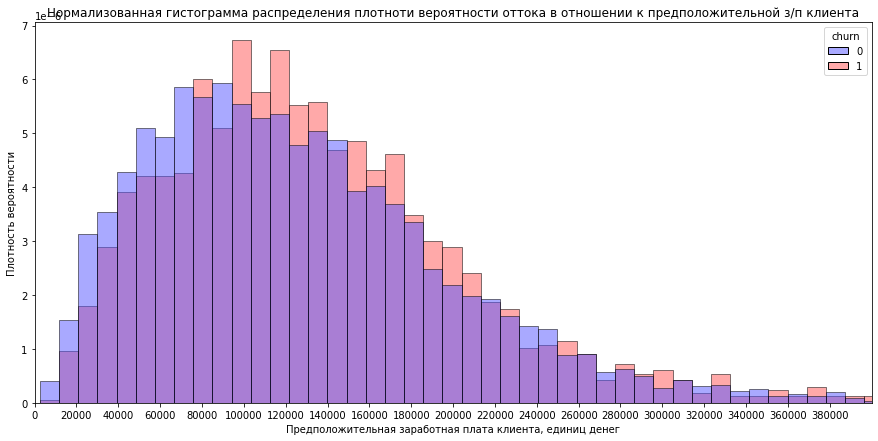

In [38]:
plt.figure(figsize=(15,7))
           
sns.histplot(data = data, hue = 'churn', x = 'est_salary', stat = 'density', common_norm = False, palette="seismic")
plt.xlim(0, 400000)
plt.xticks(range(0, 400000, 20000))
plt.title('Нормализованная гистограмма распределения плотноти вероятности оттока в отношении к предположительной з/п клиента')
plt.xlabel('Предположительная заработная плата клиента, единиц денег')
plt.ylabel('Плотность вероятности')
plt.show()

<div class="alert alert-info"> При оценка предположительной з/п основной массы клиентов видим, что вероятность оттока повышенная у клиентов с з/п от 100 до 210 тыс. денег.

<div class="alert alert-success">
<b>👍 Успех:</b> По каждому признаку определены отточные интервалы! Супер!
</div>

<div class="alert alert-info">  
    
***Глава 4. Выделение сегментов пользователей***
    
Выделим сегменты оттока путем комбинации нескольких отточных признаков.

In [39]:
data.query('820<=score<=930 and gender=="М" and city!="Рыбинск"')['churn'].agg(['count', 'mean'])

count    2057.000000
mean        0.300438
Name: churn, dtype: float64

<div class="alert alert-info">  Первый сегмент: 2057 клиентов, Процент оттока ~ 30.
    
- Баллы скоринга от 820 до 930;
- Пол клиента мужской;
- Город Ярославль и Ростов.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [40]:
data.query('25<=age<=34 and equity>=3 and products>= 2')['churn'].agg(['count', 'mean'])

count    1245.000000
mean        0.350201
Name: churn, dtype: float64

<div class="alert alert-info">  Второй сегмент: 1245 клиентов, Процент оттока ~ 35.
    
- Возраст от 25 до 34 лет;
- Баллы собственности более 2;
- Банковских продуктов более одного.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [41]:
data.query('50<=age<=59 and equity>=3 and products>= 2')['churn'].agg(['count', 'mean'])

count    794.000000
mean       0.392947
Name: churn, dtype: float64

<div class="alert alert-info">  Третий сегмент: 795 клиентов, Процент оттока ~ 39.
    
- Возраст от 50 до 59 лет;
- Баллы собственности более 2;
- Банковских продуктов более одного.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [42]:
data.query('credit_card==0 and last_activity==1 and 100000<=est_salary<=200000')['churn'].agg(['count', 'mean'])

count    740.000000
mean       0.413514
Name: churn, dtype: float64

<div class="alert alert-info">  Четвертый сегмент: 740 клиентов, Процент оттока ~ 41.
    
- Кредитки нет;
- Недавно активный клиент;
- Предположительная з/п от 100 до 200 тыс.денге.

<div class="alert alert-success">
<b>👍 Успех:</b> Отличные сегменты, молодец! Каждый сегмент в границах интервала 500-2000, отток нимного выше, чем в среднем по банку
</div>

<div class="alert alert-info">  
    
***Глава 5. Проверка статистических гипотез***

<div class="alert alert-info">  
Проверим гипотезу от отдела маркетинга о различии дохода между теми клиентами, которые ушли и теми, которые остались.
    
H0: Cредняя з/п ушедших клиентов не равна средней з/п оставшихся.
    
Н1: Cредние з/п не различаются.    
    
Т.к. выборки по признаку "отток" неравнозначные, но большие (82% / 18% датасета) имеем возможность использовать т-тест (зададим equal_var=False, тестировать будем двухстороннюю гипотезу). Параметр альфа примем за 5%.

In [43]:
alpha = 0.05
churn_yes = data.query('churn == 1')['est_salary']
churn_no = data.query('churn == 0')['est_salary']

print('Средняя з/п ушедших клиентов:', churn_yes.mean().round(2))
print('Средняя з/п верных клиентов:', churn_no.mean().round(2))

result = st.ttest_ind(churn_yes, churn_no, equal_var=False, alternative='two-sided')
print('p-значение:', result.pvalue)
      
if result.pvalue < alpha:
      print('Отвергаем нулевую гипотезу о неравенстве з/п')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

Средняя з/п ушедших клиентов: 148357.48
Средняя з/п верных клиентов: 147674.64
p-значение: 0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">  Победа за Н0: Cредняя з/п ушедших клиентов не равна средней з/п оставшихся. 
    
Также видим, что при использовании alpha = 0.01 ситуация бы не изменилась.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

<div class="alert alert-info">  
Проверим гипотезу о том, влияет ли наличие кредитной карты на факт оттока.
    
H0: Количество ушедших клиентов с кредитной картой не равно количеству оставшихся клиентов с кредиткой.
    
Н1: Количество ушедших клиентов с кредитной картой равно количеству оставшихся клиентов с кредиткой.    
    
Также имеем возможность использовать т-тест (зададим equal_var=False, тестировать будем двустороннюю гипотезу). Параметр альфа примем за 5%.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> гипотеза должны быть двустононней, и сформулировать ее можно немного по другому, сравнить ушедших и оставшихся клиентов, а не соотношение признака наличия кредитной карты у ушедших.</s>
</div>

Done!!

In [44]:
alpha = 0.05
data.drop(data.loc[data['credit_card'] == 0].index, inplace=True)
credit_gone = data.query('churn == 1')['user_id']
credit_stay = data.query('churn == 0')['user_id']

print('Количество ушедших клиентов с кредитной картой:', credit_gone.count())
print('Количество оставшихся клиентов с кредитной картой:', credit_stay.count())

result = st.ttest_ind(credit_gone, credit_stay, equal_var=False, alternative='two-sided')
print('p-значение:', result.pvalue)
      
if result.pvalue < alpha:
      print('Отвергаем нулевую гипотезу о неравенстве количества клиентов')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

Количество ушедших клиентов с кредитной картой: 1003
Количество оставшихся клиентов с кредитной картой: 5781
p-значение: 0.27962267319820994
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">  Победа за Н0: Количество ушедших клиентов с кредитной картой не равно количеству оставшихся клиентов с кредиткой.
    
Давно мучавшее предположение подтвердилось!!! Владельцам кредитных карт тяжело расстаться с банком и именно поэтому эти карты так настойчиво навязывают на каждом перекрестке. Даже alpha = 0.01 не поможет).

<div class="alert alert-success">
<b>👍 Успех:</b> Гипотезы сформулированы и проверены!
</div>

<div class="alert alert-info">  
    
***Глава 6.1 Выводы***

<div class="alert alert-info">  
    
*В соответствии с планом работ были проведены следующие мероприятия:*
    
- Глава 1: Ознакомились с данными, признали их достаточно полными и оценили пригодность к дальнейшему анализу.
    
- Глава 2: Провели исследовательский анализ - оценили распределение данных внутри каждого клиентского признака, познакомились с портретами уходящих и остающихся клиентов в зависимости от пола и места жительства.
    
- Глава 3: Спрогнозировали клиентский отток.
    
- Глава 4: Выделили пользовательские сегменты, в которых вероятность оттока сильнее.
    
- Глава 5: Проверили статистические гипотезы.

<div class="alert alert-info"> 
    
*В рамках главы №3 выявили следующие признаки оттока клиентов банка:*
    
- баллы скоринга от 820 до 930;
- города Ярославль и Ростов характеризуются бОльшим оттоком;
- мужской пол более склонен к оттоку;
- возраст клиента 25 - 34 и 50 - 59;
- оценка собственности 3 - 9;
- баланс на счету > 800 тыс.;
- банковские продукты 2 - 5;
- нет кредитной карты;
- недавняя активность;
- з/п 100 - 200 тыс.

<div class="alert alert-info"> 
    
*В рамках главы №4 выявили следующие сегменты клиентов банка, характеризующиеся высокой вероятностью оттока:*
    
- Сегмент 1 - Баллы скоринга от 820 до 930; Пол клиента мужской; Город Ярославль и Ростов. Процент оттока ~ 30.
    
- Сегмент 2 - Возраст от 25 до 34 лет; Баллы собственности более 2; Банковских продуктов более одного. Процент оттока ~ 35.
    
- Сегмент 3 - Возраст от 50 до 59 лет; Баллы собственности более 2; Банковских продуктов более одного. Процент оттока ~ 39.
    
- Сегмент 4 - Кредитки нет; Недавно активный клиент; Предположительная з/п от 100 до 200 тыс. Процент оттока ~ 41.

<div class="alert alert-info"> 
    
*В рамках главы №5 проверены следующие статистические гипотезы:*
    
- О различии дохода между теми клиентами, которые ушли и теми, которые остались. Результат проверки - средняя з/п ушедших клиентов не равна (больше) средней з/п оставшихся;
    
- О влиянии наличия кредитной карты на факт оттока. Результат проверки - количество ушедших клиентов с кредитной картой не равно (меньше) количества оставшихся клиентов с кредиткой.

<div class="alert alert-info">  
    
***Глава 6.2 Рекомендации***
    
При проектировании маркетинговых кампаний обратить внимание на:
    
- Наличие кредитной карты снижает вероятность оттока. Необходимо раздавать кредитки при каждом обращении сотрудника в банк, а при дистанционном обращении - высылать кредитку курьером.
- Наличие у клиента "свободных" денег повышает вероятность оттока. Необходимо снизить лимит на ежедневные/ежемесячные переводы и снятия в банкоматах, а также предложить клиенту выгодную систему долгосрочного капиталовложения.
- Мужской пол более склонен к оттоку. Необходимо сделать маркетинговые акции непосредственно для мужчин: объяснять рекламой, насколько брутально держать деньги в "Метанпроме" и насколько небрутально их оттуда выводить.
- Возраст клиента 25 - 34 и 50 - 59 наиболее склонны к оттоку. Привлекательные краткосрочные вклады для молодых людей ("на отсрочку") и выгодные долгосрочные вклады для пожилых людей ("к пенсии") позволят повлиять на данные группы клиентов.

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации
</div>